![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Web Scraping Multiple Pages

#### Business goal:

- Check the `case_study_gnod.md` file.
- Make sure you've understood the big picture of your project:

  - the goal of the company (`Gnod`),
  - their current product (`Gnoosic`),
  - their strategy, and
  - how your project fits into this context.

  Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to accomplish.

#### Instructions 

#### Prioritize the MVP

In the previous lab, you had to scrape data about "hot songs". It's critical to be on track with that part, as it was part of the request from the CTO.

If you couldn't finish the first lab, use this time to go back there.

#### Expand the project

If you're done, you can try to expand the project on your own. Here are a few suggestions:

- Find other lists of hot songs on the internet and scrape them too: having a bigger pool of songs will be awesome!
- Apply the same logic to other "groups" of songs: the best songs from a decade or from a country / culture / language / genre.
- Wikipedia maintains a large collection of lists of songs: https://en.wikipedia.org/wiki/Lists_of_songs

#### Practice web scraping

As you've seen, scraping the internet is a skill that can get you all sorts of information. Here are some little challenges that you can try to gain more experience in the field:

- Retrieve an arbitrary Wikipedia page of "Python" and create a list of links on that page: `url ='https://en.wikipedia.org/wiki/Python'`
- Find the number of titles that have changed in the United States Code since its last release point: `url = 'http://uscode.house.gov/download/download.shtml'`
- Create a Python list with the top ten FBI's Most Wanted names: `url = 'https://www.fbi.gov/wanted/topten'`
- Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe: `url = 'https://www.emsc-csem.org/Earthquake/'`
- List all language names and number of related articles in the order they appear in [wikipedia.org](wikipedia.org): `url = 'https://www.wikipedia.org/'`
- A list with the different kind of datasets available in [data.gov.uk](data.gov.uk): `url = 'https://data.gov.uk/'`
- Display the top 10 languages by number of native speakers stored in a pandas dataframe: `url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'`




In [1]:
from bs4 import BeautifulSoup
from time import sleep
import random
from tqdm.notebook import tqdm
import requests
import pandas as pd
from datetime import datetime

In [2]:
url = "https://www.billboard.com/charts/hot-100"

In [3]:
response = requests.get(url)

In [20]:
type(response)

requests.models.Response

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [21]:
type(soup)

bs4.BeautifulSoup

In [134]:
titles = []
artists = []
for tag in soup.find_all("span", attrs={"class":"chart-element__information__song text--truncate color--primary"}):
    titles.append(tag.get_text())
for tag in soup.find_all("span", attrs={"class":"chart-element__information__artist text--truncate color--secondary"}):
    artists.append(tag.get_text())

In [135]:
type(tag.get_text())

str

storing in a DF all the songs from top100 ranking we scraped

In [136]:
hot = pd.DataFrame({'title':titles, 'artist':artists})
hot.head()

,title,artist
0,Drivers License,Olivia Rodrigo
1,34+35,Ariana Grande
2,Calling My Phone,Lil Tjay Featuring 6LACK
3,Blinding Lights,The Weeknd
4,Up,Cardi B


In [137]:
hot.shape

(100, 2)

...some more scraping

Get more songs from wikipedia

Opted for all the songs in Glee seasons

In [25]:
urls = []
for i in range(1,7):
    urls.append(f"https://en.wikipedia.org/wiki/List_of_songs_in_Glee_(season_{i})")

response = requests.get(urls[0])

soups = []
for i in urls:
    soups.append(BeautifulSoup((requests.get(i)).content, 'html.parser'))

In [9]:
len(soups[0].select('.wikitable > tbody > tr > th > a'))

132

In [8]:
titles = []
artists = []

for i in soups:
    for tag in (i.select('.wikitable > tbody > tr > th:nth-child(1)')):
        if (tag['scope'] == 'row'):
            titles.append(tag.get_text().rstrip().strip('\"'))
    for tag in i.select('.wikitable > tbody > tr > td:nth-child(3)'):
        artists.append(tag.get_text())
#     print('titles',len(titles),'artists',len(artists))

In [9]:
def add_new_data(df, list1, list2):
    df = pd.concat([df, pd.DataFrame({'title':list1, 'artist':list2})], axis=0)
    return df

In [14]:
data = add_new_data(data, titles, artists)

In [13]:
data.shape

(843, 2)

In [15]:
# Top 40 'alt' songs. Can be searched by week (yyyy-mm-dd)
# Let's get one year of data
urls = []
dates = pd.date_range('2020-02-24', '2021-02-24', freq='W')
dates = [date.strftime('%Y-%m-%d') for date in dates]

for i in dates:
    urls.append(f'https://www.billboard.com/charts/alternative-airplay/{i}')

In [16]:
soups = []
for url in tqdm(urls):
    soups.append(BeautifulSoup(requests.get(url).content))
    sleep(random.random())

In [16]:
titles = []
artists = []

for soup in soups:

    for tag in soup.find_all('span', 'chart-list-item__title-text'):
        titles.append(tag.get_text().strip())
    
    for tag in soup.find_all('div', 'chart-list-item__artist'):
        artists.append(tag.get_text().strip())

#     print(len(titles), len(artists))

In [17]:
data = add_new_data(data, titles, artists)

In [18]:
data.shape

(2923, 2)

## Next -  Use SpotiPy to create a vast collection of songs

In case the song inputed is not present in the top100 (of df so far) we will build a function that recommends another song based on a wide collection from spotify.

API wrapper

In [26]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [27]:
client_id = input("input cliend id") #de9b363a48b943c08984ea56c21bf873
client_secret = input('input client ') #76e5fbd4c8044d2aa25d12b5dfe7b45a

input cliend idde9b363a48b943c08984ea56c21bf873
input client 76e5fbd4c8044d2aa25d12b5dfe7b45a


In [28]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [29]:
playlist = sp.user_playlist_tracks("spotify", "4rnleEAOdmFAbRcNCgZMpY")

In [30]:
# Function:
        # input: username, playlist_id
        # output: ALL the songs, not just 100
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        # print(results['next'])
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [31]:
# now let'S store all the tracks in a variable
all_tracks = get_playlist_tracks('spotify', "4rnleEAOdmFAbRcNCgZMpY")
len(get_playlist_tracks('spotify', "4rnleEAOdmFAbRcNCgZMpY"))

5198

In [32]:
# we need this puzzle piece for our function
# this gets us the artist ids from one track
def get_artists_ids_from_track(track):
    return[artist["id"] for artist in track["artists"]]

# another puzzle piece
def get_artists_from_track(track):
    return [artist["name"] for artist in track["artists"]]




# THIS IS OUR FUNCTION THAT SHOULD DO THE JOB
def get_artists_from_playlist(playlist_id):
    tracks_from_playlist = get_playlist_tracks('spotify', playlist_id)
    
    # should return all the artists
        # but they should be unique! so we make use of set()
    
    return set([artist for subset in [get_artists_from_track(track['track']) for track in tracks_from_playlist] for artist in subset])

In [33]:
tracks_from_playlist = get_playlist_tracks('spotify', "4rnleEAOdmFAbRcNCgZMpY")

In [34]:
[get_artists_from_track(track['track']) for track in tracks_from_playlist]

[['Hozier'],
 ['Mike Posner', 'Gigamesh'],
 ['Tyler, The Creator', 'Kali Uchis'],
 ['Bastille'],
 ['Shakira', 'Wyclef Jean'],
 ['The Script', 'will.i.am'],
 ['Otto Knows', 'Avicii'],
 ['Selena Gomez'],
 ['Taio Cruz'],
 ['Mohombi'],
 ['Lucenzo', 'Don Omar'],
 ['Cheek', 'Yasmine Yamajako'],
 ['Flo Rida'],
 ['Avril Lavigne'],
 ['Justin Bieber', 'Ludacris'],
 ['Flo Rida'],
 ['Mohombi', 'Nicole Scherzinger'],
 ['Justin Bieber'],
 ['Pikku G', 'Sophie'],
 ['Swedish House Mafia', 'John Martin'],
 ['Macklemore & Ryan Lewis'],
 ['David Guetta', 'Sia'],
 ['Imagine Dragons'],
 ['Flo Rida'],
 ['Calvin Harris', 'Ellie Goulding'],
 ['Pitbull', 'Kesha'],
 ['will.i.am', 'Britney Spears'],
 ['Avicii'],
 ['Macklemore & Ryan Lewis', 'Wanz'],
 ['David Guetta'],
 ['The Script'],
 ['Flo Rida'],
 ['OneRepublic'],
 ['PSY'],
 ['Pitbull', 'Christina Aguilera'],
 ['FRENSHIP', 'Emily Warren'],
 ['Tungevaag', 'Raaban'],
 ['Leona Lewis'],
 ['Tujamo'],
 ['Jonas Blue', 'JP Cooper'],
 ['Axwell /\\ Ingrosso'],
 ['Joel A

In [35]:
# We want to flatten the nested list of artists! We can do that with a nested list comprehension
set([artist for subset in [get_artists_from_track(track['track']) for track in tracks_from_playlist] for artist in subset])

{'',
 'Gente De Zona',
 'Danelle Sandoval',
 'Purple Disco Machine',
 'DJ Antoine',
 'PUBLIC',
 'Crystal Castles',
 'Chase Atlantic',
 'The Notorious B.I.G.',
 'Marcus Vinicius Campos',
 'Robyn',
 'Anastacia',
 'Robin Schulz',
 'Bryce Vine',
 'JP Saxe',
 'CMC$',
 'Anna Maria Perez de Taglé',
 'Cavallini',
 'Martin Garrix',
 'Mariah Carey',
 'Oh Wonder',
 'Aika',
 'Ava Max',
 'Bekuh Boom',
 'Olivia',
 'Britney Spears',
 'Hätä-Miikka',
 'Poo Bear',
 'Ellips',
 'Landon Cube',
 'Moon OA',
 'L.V.',
 'Fergie',
 'Jay Hardway',
 'Gavin James',
 'Anna Järvinen',
 'DJ Battlecat',
 'salem ilese',
 'Baltimora',
 'BeatKing',
 'All Time Low',
 'Lukas Graham',
 'Justin Timberlake',
 'P. Moody',
 'Ultradiox',
 'Lindsey Stirling',
 'Matisse & Sadko',
 'Spekti',
 'Astrid S',
 'We The Kings',
 'Mannie Fresh',
 'Sebastian Ingrosso',
 'A2M',
 'Kaoma',
 'La Santa Cecilia',
 'Smokepurpp',
 'Rvssian',
 'Auntie Hammy',
 'SIDEPIECE',
 'John Martin',
 'Cimo Fränkel',
 'Mikkel Øwre',
 'XAM',
 'FRENSHIP',
 'Fall O

In [36]:
len(get_artists_from_playlist("4rnleEAOdmFAbRcNCgZMpY"))

2395

In [37]:
# Copy pasting the above function "get_artists_from_playlist" to rewrite it so that it gives us the artist IDs

def get_artist_ids_from_playlist(playlist_id):
    tracks_from_playlist = get_playlist_tracks('spotify', playlist_id)
    
    # should return all the artists
        # but they should be unique! so we make use of set()
    
    return set([artist for subset in [get_artists_ids_from_track(track['track']) for track in tracks_from_playlist] for artist in subset])

In [38]:
artist_ids = get_artist_ids_from_playlist("4rnleEAOdmFAbRcNCgZMpY")

In [39]:
get_artists_from_playlist("37i9dQZF1DWTcqUzwhNmKv")

{'Amaranthe',
 'Amorphis',
 'Andrew W.K.',
 'Andy Dörner',
 'Annisokay',
 'Architects',
 'Arion',
 'Attack Attack!',
 'Black Veil Brides',
 'Brand of Sacrifice',
 'Bring Me The Horizon',
 'Butcher Babies',
 'Captives',
 'Cyan Kicks',
 'DEAR MOTHER',
 'Dead by April',
 'DevilDriver',
 'Dragged Under',
 'Dream Drop',
 'ERRA',
 'Epica',
 'Evergrey',
 'Eyes Set To Kill',
 'Fight The Fade',
 'Fit For A King',
 'Gama Bomb',
 'Gojira',
 'HELLYEAH',
 'Harakiri for the Sky',
 'Hollow Front',
 'Hyro The Hero',
 'Ill Niño',
 'Imminence',
 'Islander',
 'James Labrie',
 'Keith Wallen',
 'LANDMVRKS',
 'Lamb of God',
 'Love and Death',
 'Machine Head',
 'Manafest',
 'Mike Kerr',
 'Novelists FR',
 'Oceans',
 'Of Mice & Men',
 'Onlap',
 'Orchards',
 'Redlight King',
 'Rob Zombie',
 'Ryan Kirby',
 'Ryo Kinoshita',
 'Sabaton',
 'Silver End',
 'Skywalker',
 'Soen',
 'Spiritbox',
 'Sylosis',
 'System Of A Down',
 'Tetrarch',
 'The HU',
 'Thy Art Is Murder',
 'VEXED',
 'VOLA',
 'Veil Of Maya',
 'Wake Up Hat

In [40]:
user = 'spotify'

playlists = sp.user_playlists(user)
playlist_uri=[]


while playlists:
    for playlist in playlists['items']:
        playlist_uri.append(playlist['uri'])
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

In [41]:
b=get_playlist_tracks('spotify', '37i9dQZF1DXcBWIGoYBM5M')

In [42]:
b[0]['track']['name']

'Calling My Phone'

In [43]:
hamid=[]
lorenz=[]
nico=[]


for playlist in tqdm(playlist_uri):
    
    a=get_playlist_tracks('spotify', playlist)
    
    try:
        for i in tqdm(a):
            hamid.append(i['track']['id'])
            lorenz.append(i['track']['artists'][0]['name'])
            nico.append(i['track']['name'])
    except:
        pass
    

In [57]:
data=pd.DataFrame({'id':hamid, 'artist/s':lorenz, 'song_name':nico})

In [59]:
data.shape

(102129, 3)

In [61]:
hamid2=hamid[0:5000]
lorenz2=lorenz[0:5000]
nico2=nico[0:4999]

In [62]:
khurshid=[]
    
for hami in tqdm(hamid2):
    khurshid.append(sp.audio_features(hami))

In [170]:
khurshid

[[{'danceability': 0.907,
   'energy': 0.393,
   'key': 4,
   'loudness': -7.636,
   'mode': 0,
   'speechiness': 0.0539,
   'acousticness': 0.451,
   'instrumentalness': 1.35e-06,
   'liveness': 0.135,
   'valence': 0.202,
   'tempo': 104.949,
   'type': 'audio_features',
   'id': '5Kskr9LcNYa0tpt5f0ZEJx',
   'uri': 'spotify:track:5Kskr9LcNYa0tpt5f0ZEJx',
   'track_href': 'https://api.spotify.com/v1/tracks/5Kskr9LcNYa0tpt5f0ZEJx',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5Kskr9LcNYa0tpt5f0ZEJx',
   'duration_ms': 205458,
   'time_signature': 4}],
 [{'danceability': 0.841,
   'energy': 0.593,
   'key': 1,
   'loudness': -7.846,
   'mode': 1,
   'speechiness': 0.0379,
   'acousticness': 0.418,
   'instrumentalness': 0,
   'liveness': 0.124,
   'valence': 0.808,
   'tempo': 124.917,
   'type': 'audio_features',
   'id': '5uEYRdEIh9Bo4fpjDd4Na9',
   'uri': 'spotify:track:5uEYRdEIh9Bo4fpjDd4Na9',
   'track_href': 'https://api.spotify.com/v1/tracks/5uEYRdEIh9Bo4fpjDd4Na

In [63]:
audiof=[]
data = pd.DataFrame(khurshid[0][0].keys())
for i in tqdm(khurshid):
    try:
        audiof.append(i[0].values())
        data= pd.concat([data,pd.DataFrame(i)], axis=0)
    except:
        pass
data.head()

,0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,key,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,loudness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
import numpy as np

In [67]:
num=data.select_dtypes(np.number)

In [68]:
num = num.dropna()

In [72]:
num=pd.DataFrame(num).reset_index()

In [74]:
num= num.drop('index', axis=1)

In [171]:
num

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.451000,0.907,205458.0,0.393,0.000001,4.0,0.1350,-7.636,0.0,0.0539,104.949,4.0,0.202
1,0.418000,0.841,162803.0,0.593,0.000000,1.0,0.1240,-7.846,1.0,0.0379,124.917,4.0,0.808
2,0.031900,0.722,165507.0,0.588,0.000000,6.0,0.1830,-5.932,1.0,0.0544,134.010,4.0,0.590
3,0.021200,0.680,215627.0,0.826,0.000012,0.0,0.5430,-5.487,1.0,0.0309,118.051,4.0,0.644
4,0.721000,0.585,242014.0,0.436,0.000013,10.0,0.1050,-8.761,1.0,0.0601,143.874,4.0,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.000035,0.347,357227.0,0.853,0.698000,7.0,0.0782,-9.518,1.0,0.0441,135.087,4.0,0.345
4995,0.000015,0.459,221500.0,0.673,0.001740,1.0,0.0505,-8.846,1.0,0.0280,101.159,4.0,0.549
4996,0.007190,0.654,200307.0,0.810,0.002510,4.0,0.1650,-6.260,0.0,0.0288,114.623,4.0,0.661
4997,0.484000,0.696,197928.0,0.795,0.004510,7.0,0.1820,-5.591,0.0,0.0562,83.982,4.0,0.658


In [76]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(num)

In [189]:
from sklearn.cluster import KMeans

### Elbow method to check inertia of various k's and we want to choose the lowest possible inertia without it being too low (overfitting would occur)

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

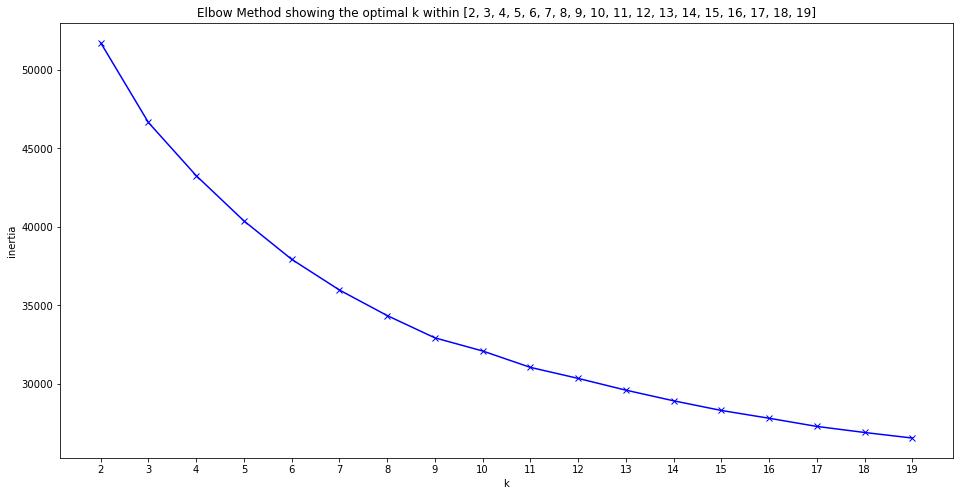

In [82]:
import numpy as np
K = range(2,20)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(X_prep)
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

### Checkl the Silhouette Score and ideally chose the highest k from there

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

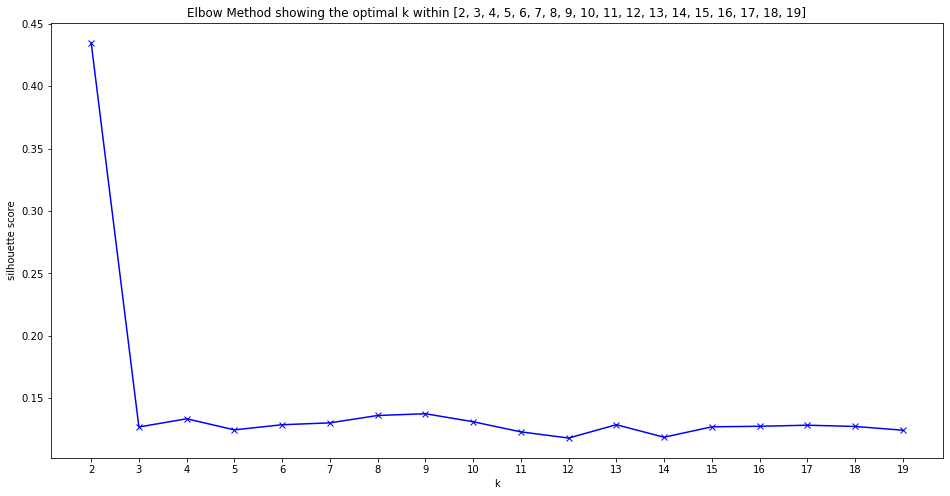

In [83]:
from sklearn.metrics import silhouette_score

import numpy as np
K = range(2,20)
silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep,
                                     kmeans.predict(X_prep)
                                    )
                   )
    
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

### Visualizing the Silhouette now helps to choose the proper k
* knives should be too sharp, be broad and go down suddenly
* all colours should be above the threshold
* ideally minimize negative values


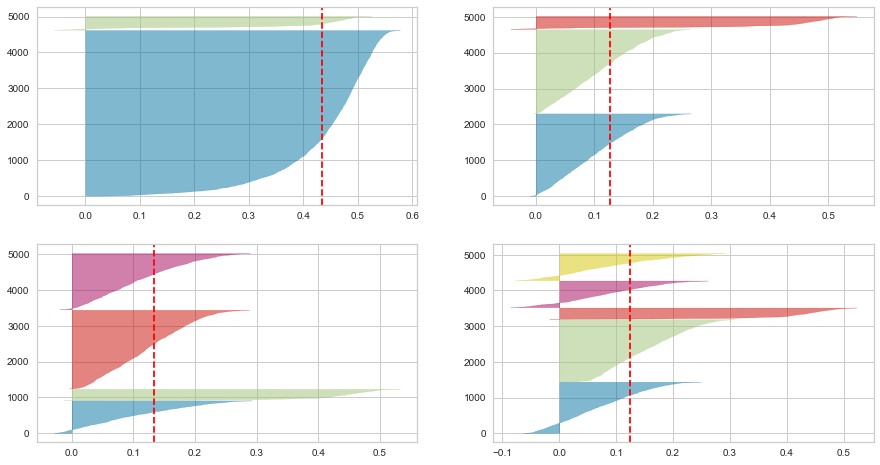

In [84]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k,
                random_state=1234)
    q, mod = divmod(k, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_prep)

In [85]:
kmeans = KMeans(n_clusters=2,
               random_state=1234)
kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)

In [86]:
final_df=pd.DataFrame(X_prep, columns=num.columns)

In [108]:
final_df['song_name']= nico2

In [87]:
final_df['clusters']=clusters

In [109]:
final_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,clusters,song_name
0,0.701440,1.911751,-0.080961,-1.034578,-0.354919,-0.325431,-0.330936,0.095262,-1.357782,-0.426108,-0.550455,0.17147,-1.329559,0,Calling My Phone
1,0.593592,1.525528,-0.770077,-0.215669,-0.354924,-1.166025,-0.408529,0.059080,0.736495,-0.569317,0.110073,0.17147,1.322526,0,Goosebumps - Remix
2,-0.668228,0.829156,-0.726392,-0.236142,-0.354924,0.234965,0.007651,0.388860,0.736495,-0.421633,0.410864,0.17147,0.368476,0,We're Good
3,-0.703197,0.583378,0.083325,0.738360,-0.354874,-1.446222,2.547053,0.465533,0.736495,-0.631972,-0.117050,0.17147,0.604800,0,Save Your Tears
4,1.583832,0.027451,0.509623,-0.858513,-0.354871,1.355756,-0.542553,-0.098574,0.736495,-0.370615,0.737158,0.17147,-1.635906,0,drivers license


In [89]:
len(final_df[final_df['clusters']==0])

4615

In [90]:

kmeans.cluster_centers_

array([[-0.19662   ,  0.0909501 ,  0.06777043,  0.19589453, -0.23123175,
         0.00534228,  0.03690834,  0.24467089, -0.00773336,  0.02484286,
         0.03781674,  0.07461677,  0.09029674],
       [ 2.36302422, -1.0930591 , -0.81448061, -2.35430541,  2.77899616,
        -0.06420472, -0.44357288, -2.94051078,  0.09294124, -0.29856715,
        -0.45449026, -0.89676146, -1.08520687]])

In [91]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=num.columns)

In [92]:
cluster_centers_df['cluster_id'] = range(0,2)

In [93]:
cluster_centers_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster_id
0,-0.196620,0.090950,0.067770,0.195895,-0.231232,0.005342,0.036908,0.244671,-0.007733,0.024843,0.037817,0.074617,0.090297,0
1,2.363024,-1.093059,-0.814481,-2.354305,2.778996,-0.064205,-0.443573,-2.940511,0.092941,-0.298567,-0.454490,-0.896761,-1.085207,1


### Plotting the clusters based on chosen variables will help understand if they have been clustered properly
* ideally check the highly correlated variables (from the correlation map)

<AxesSubplot:xlabel='energy', ylabel='tempo'>

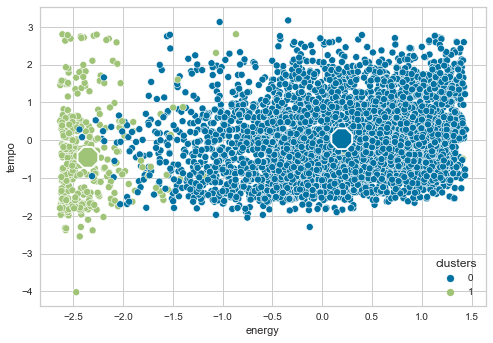

In [94]:
import seaborn as sns

# plot datapoints
sns.scatterplot(data=final_df,
               x="energy",
               y="tempo",
               hue='clusters')

# plot centroids
sns.scatterplot(data=cluster_centers_df,
               x="energy",
               y="tempo",
               hue='cluster_id',
                legend=False,
                marker=u'8',
                s=500,
               )

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


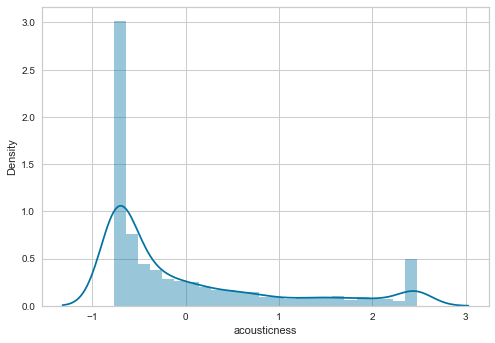

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


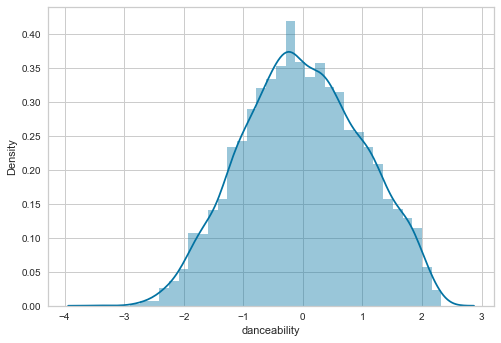

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


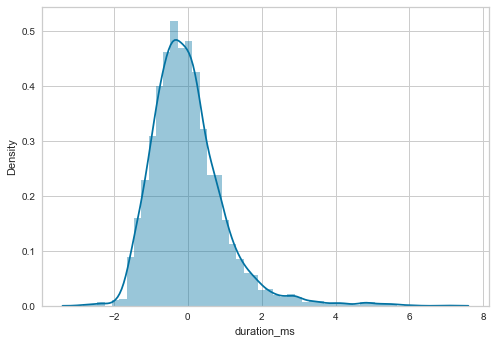

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


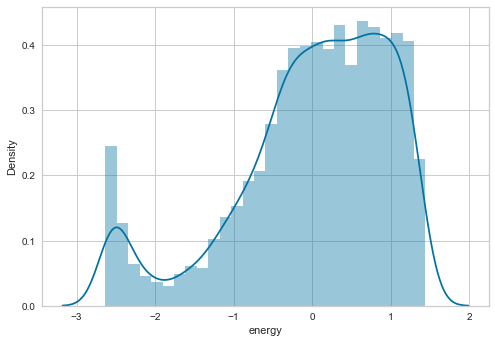

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


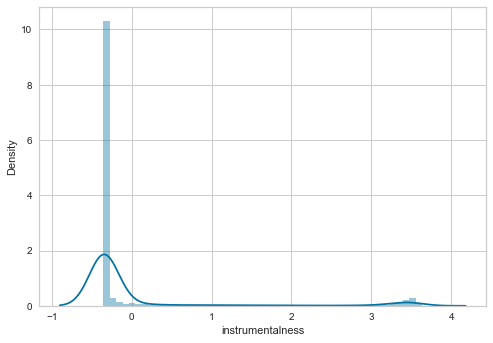

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


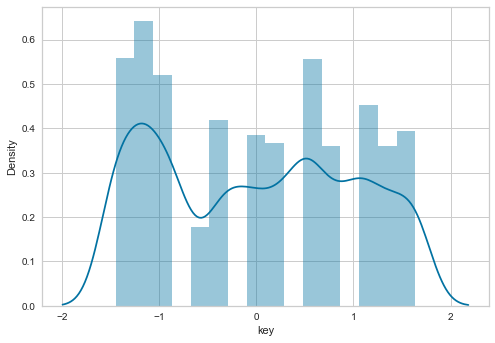

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


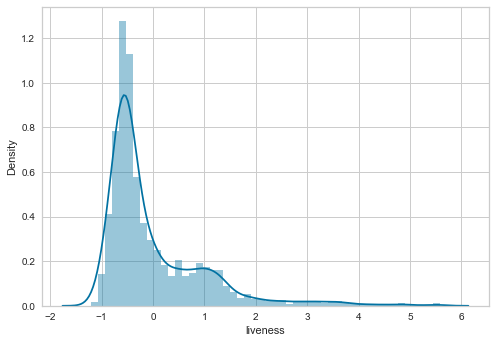

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


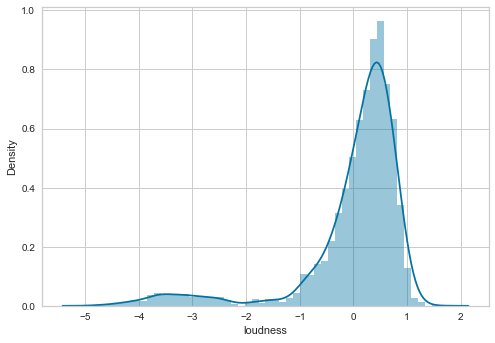

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


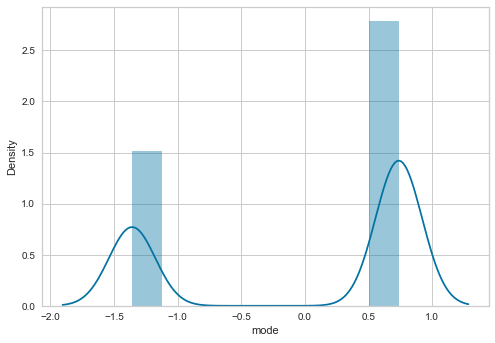

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


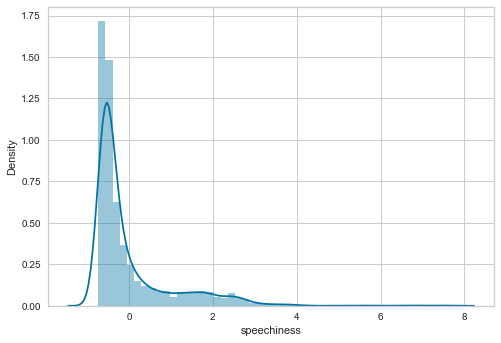

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


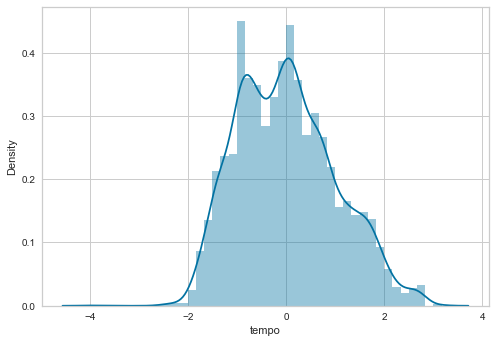

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


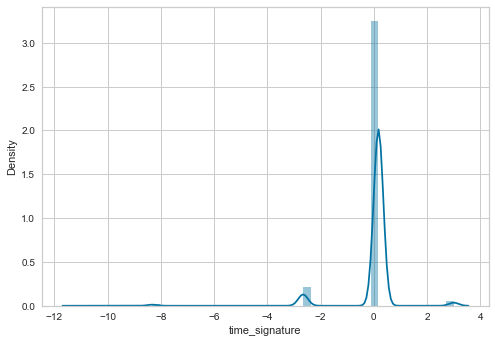

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


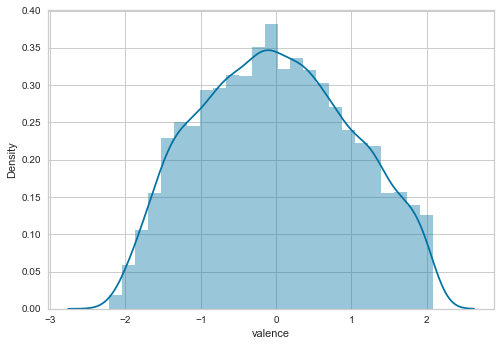

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


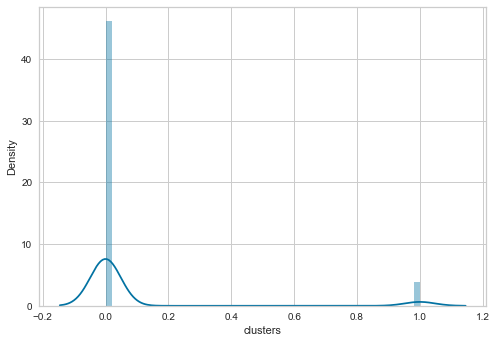

C:\Users\Lorenzo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Calling My Phone'

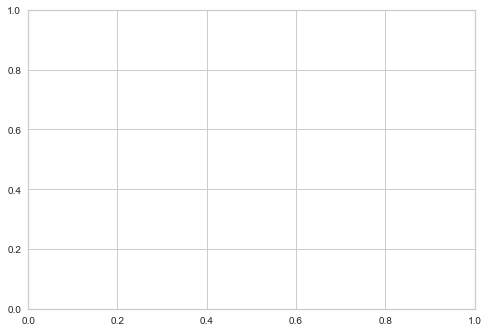

In [196]:
#get a sense of dimension distributions 
#(two of them are bimodal- arguably the highly correlated ones / that explains why 2 is a good k)

for i in final_df.columns:
    sns.distplot(final_df[i])
    plt.show()

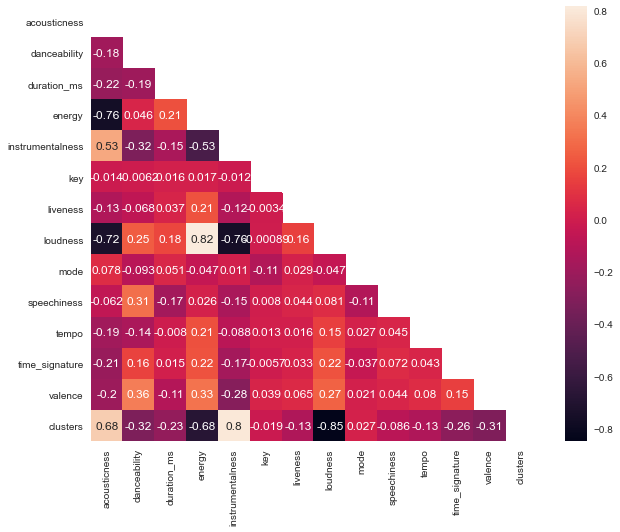

In [96]:
correlations_matrix= final_df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

## We now define the function that will:

* Check if the song that the user inputs is a hot song (from the top100 ranking)
* If it isn't, take the song, find the track id - extract the audio features through SpotiPy API wrapper - feed these into our clustering model and recommend another some **from the same cluster** as output to the user.

In [194]:
import random
def my_recommendation():
    empty = []
    [empty.append(i.lower()) for i in list(hot['title'])]           #making out hot songs ready to be parsed
    guess = str(input('Please Enter your choice of song ')).lower() #user inputs a song's name
    temp = [song for song in empty]
    if guess in temp:                                           #recommend another hot song if song inserted is hot
        temp.remove(guess)
        recom = random.choice(temp)
        print('recommended song: "{}"'.format(recom))
    else:                                                        #otherwise take the input song, extract features and assign it to cluster
        search_res=sp.search(q=guess, limit=50)
        track_id=search_res['tracks']['items'][0]['id']
        af=sp.audio_features(track_id)
        l=[af[0]['acousticness'], af[0]['danceability'], af[0]['duration_ms'], af[0]['energy'],
           af[0]['instrumentalness'], af[0]['key'], af[0]['liveness'], af[0]['loudness'], af[0]['mode'],
           af[0]['speechiness'], af[0]['tempo'], af[0]['time_signature'], af[0]['valence']]
        arr = np.array(l).reshape(1,-1)
        a = int(kmeans.predict(arr))
        print('The algorith predicted that a good match based on your taste is: ', 
              final_df[final_df['clusters']==a]['song_name'].sample())


In [195]:
my_recommendation()

Please Enter your choice of song Ghetto Gospel
The algorith predicted that a good match based on your taste is:  4820    Wait and Bleed
Name: song_name, dtype: object
